# TO DO:

1. [X] Fix the y-coordinate flip 
2. [X] Recreate Plots
3. [X] 'Accurate Peak Fitting Code'
4. 'Explore TDC fit of X'

## Ideas:

Relate the meanTDC vs coordinate to space-time diagrams and understand platooning.

# Study of TDC for Application in $\mu$ Track Reconstruction

Import the `MuDataFrame` Objects. Using the lead brick with gap as the `mdfo_lead` object.

In [2]:
from MuDataFrame import *

mdfo_calib = MuDataFrame("/Users/sc/Projects/Summer2021/Muons/dataFiles/calibration_new_set_up.csv")

mdf_calib = mdfo_calib.events_df

mdfo_calib.og_df = mdf_calib.copy()
mdfo_calib.show()

,Unnamed: 0,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,0,2021-05-03 12:40:15.812760,0,1.0,1.0,1.0,1.0,1.0,...,13.455446,NaN,0.342978,622,-5.445887,-22.562492,-6.807692,-22.684615,day,0
1,1,1,1,2021-05-03 12:40:16.502963,0,1.0,1.0,1.0,1.0,1.0,...,12.002813,NaN,0.703353,622,-11.762760,-21.506829,-11.538462,-21.784615,day,690203
2,2,2,2,2021-05-03 12:40:16.672924,0,1.0,1.0,1.0,1.0,1.0,...,14.672630,NaN,0.210716,622,35.347122,13.620282,36.676923,14.884615,day,860164
3,3,3,3,2021-05-03 12:40:16.892987,0,1.0,1.0,1.0,1.0,1.0,...,15.284964,NaN,0.259347,622,24.903617,25.826667,27.746154,29.153846,day,1080227
4,4,4,4,2021-05-03 12:40:17.563102,0,1.0,1.0,1.0,1.0,1.0,...,4.253100,NaN,11.038012,622,6.978340,14.482143,7.676923,15.230769,day,1750342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,99995,2999995,2021-05-20 13:18:30.375574,0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,656,NaN,NaN,NaN,NaN,day,1077345562814
2999996,2999996,99996,2999996,2021-05-20 13:18:30.965416,0,1.0,1.0,1.0,1.0,1.0,...,6.035804,NaN,0.442759,656,12.892377,-12.244589,13.269231,-13.276923,day,1077346152656
2999997,2999997,99997,2999997,2021-05-20 13:18:31.405694,0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,656,-25.480419,NaN,-27.830769,NaN,day,1077346592934
2999998,2999998,99998,2999998,2021-05-20 13:18:31.725719,0,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,656,NaN,NaN,NaN,NaN,day,1077346912959


For a fixed $x$ coordinate (Tray 1) in top layer, we make cuts on different $y$ coordinates (Tray 2) and look into the TDC distribution on the **left channel of Tray 1**.

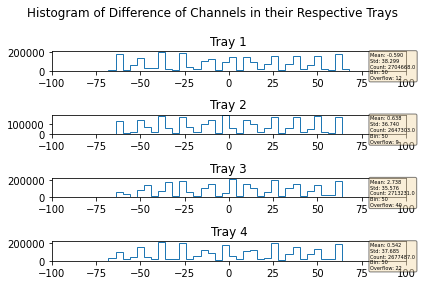

In [2]:
mdfo_calib.reload()
mdfo_calib.getChannelDiffPlots()

In [1]:
mdfo_calib.getHistogram("z_angle")

NameError: name 'mdfo_calib' is not defined

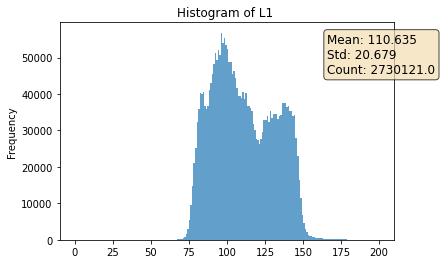

In [3]:
mdfo_calib.getHistogram("L1",range=(0,200))

The coordinates on Tray 1 ($x$) and Tray 2 ($y$) are as follows:

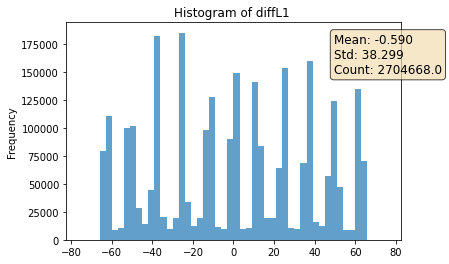

In [4]:
mdfo_calib.getHistogram("diffL1",range=(-75,75),nbins=50)

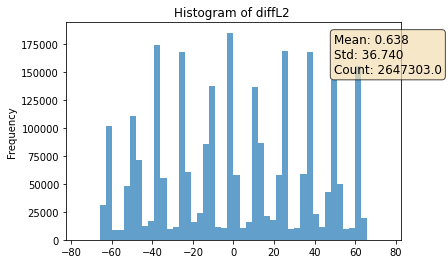

In [5]:
mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)

Making the cut on x.

In [90]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

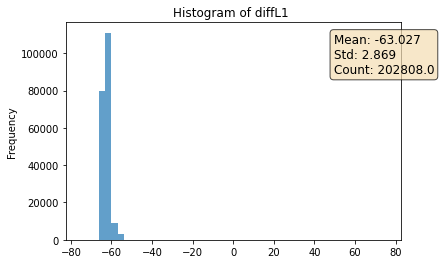

In [91]:
mdfo_calib.getHistogram("diffL1",range=(-75,75),nbins=50)

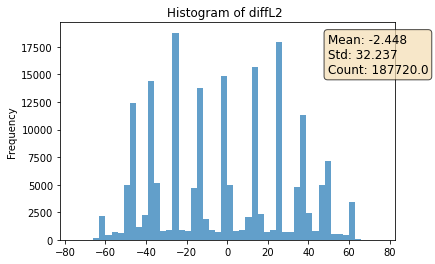

In [92]:
mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)

Going from left to right on the y-coordinate system.

In [93]:
mdfo_calib.keepEvents("diffL2",57,">=")

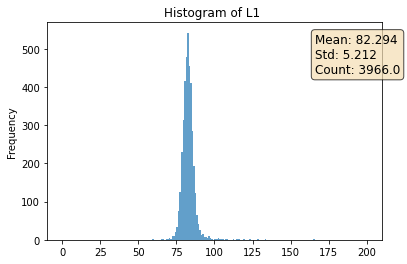

In [94]:
x1_1 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

Doing similar analyses for the other $y$ coordinates.

In [95]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")
mdfo_calib.keepEvents("diffL2",43,">=")
mdfo_calib.keepEvents("diffL2",59,"<=")

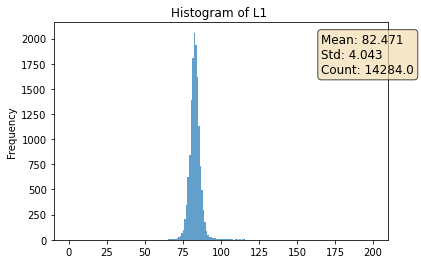

In [96]:
x1_2 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

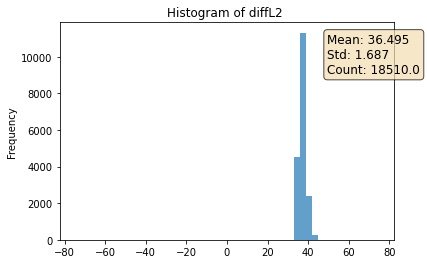

In [97]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",34,">=")
mdfo_calib.keepEvents("diffL2",42,"<=")
mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)

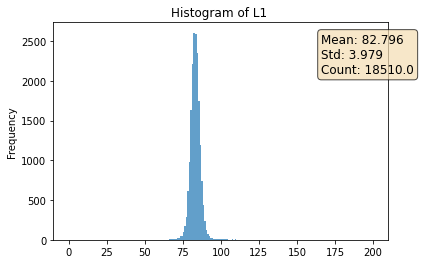

In [66]:
x1_3 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

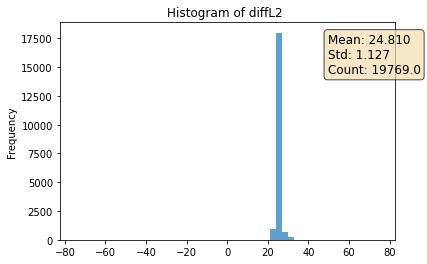

In [67]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",21,">=")
mdfo_calib.keepEvents("diffL2",30,"<=")
mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)

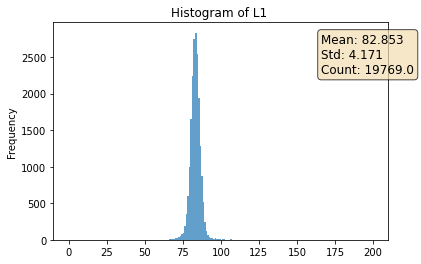

In [68]:
x1_4 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [69]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",11,">=")
mdfo_calib.keepEvents("diffL2",19,"<=")

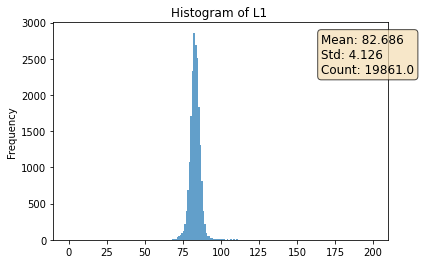

In [70]:
x1_5 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [75]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",-5,">=")
mdfo_calib.keepEvents("diffL2",5,"<=")

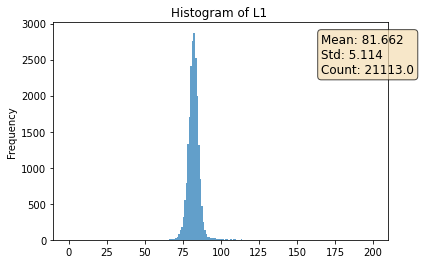

In [76]:
x1_6 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [79]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",-17,">=")
mdfo_calib.keepEvents("diffL2",-10,"<=")

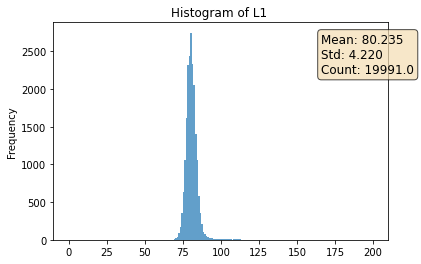

In [80]:
x1_7 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [81]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",-30,">=")
mdfo_calib.keepEvents("diffL2",-20,"<=")

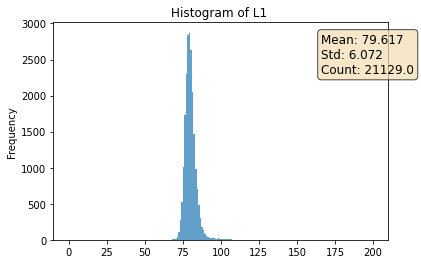

In [82]:
x1_8 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [83]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",-38,">=")
mdfo_calib.keepEvents("diffL2",-32,"<=")

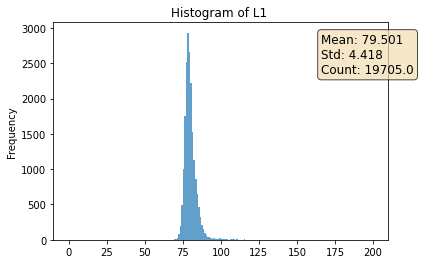

In [84]:
x1_9 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [85]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",-51,">=")
mdfo_calib.keepEvents("diffL2",-45,"<=")

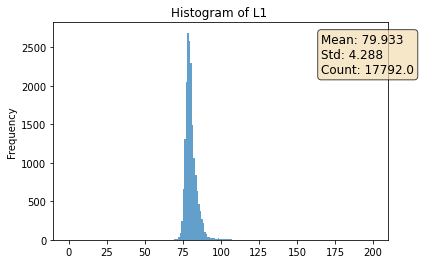

In [86]:
x1_10 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

In [87]:
mdfo_calib.reload()
mdfo_calib.keepEvents("diffL1",-57,"<=")

mdfo_calib.keepEvents("diffL2",-51,"<")

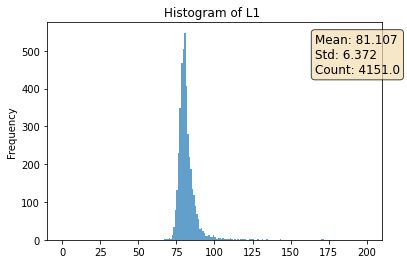

In [88]:
x1_11 = mdfo_calib.get("L1")
mdfo_calib.getHistogram("L1",range=(0,200))

Comparing all the distributions.

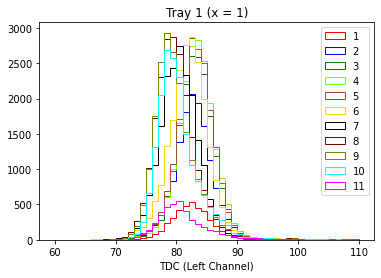

In [98]:
import seaborn as sns

sns.color_palette("Spectral")
bins = 50
range = (60,110)
xval = 1

plt.hist(x1_1,label="1",bins=bins,range=range,histtype="step",color="red")
plt.hist(x1_2,label="2",bins=bins,range=range,histtype="step",color="blue")
plt.hist(x1_3,label="3",bins=bins,range=range,histtype="step",color="green")
plt.hist(x1_4,label="4",bins=bins,range=range,histtype="step",color="lawngreen")
plt.hist(x1_5,label="5",bins=bins,range=range,histtype="step",color="sienna")
plt.hist(x1_6,label="6",bins=bins,range=range,histtype="step",color="gold")
plt.hist(x1_7,label="7",bins=bins,range=range,histtype="step",color="black")
plt.hist(x1_8,label="8",bins=bins,range=range,histtype="step",color="maroon")
plt.hist(x1_9,label="9",bins=bins,range=range,histtype="step",color="olive")
plt.hist(x1_10,label="10",bins=bins,range=range,histtype="step",color="cyan")
plt.hist(x1_11,label="11",bins=bins,range=range,histtype="step",color="fuchsia")
plt.legend()
plt.xlabel("TDC (Left Channel)")
plt.title("Tray 1 (x = {})".format(xval))
#plt.savefig("tdc_hist_1.pdf")
plt.show()

In [99]:
data_x = [x1_1,x1_2,x1_3,x1_4,x1_5,x1_6,x1_7,x1_8,x1_9,x1_10,x1_11]
data_x_means = [np.mean(i) for i in data_x]
data_x_stds = [np.std(i) for i in data_x]
yvals = np.linspace(1,11,11)

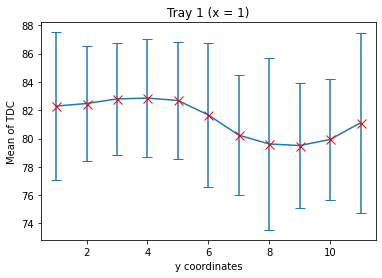

In [100]:
plt.errorbar(x=yvals, y=data_x_means, marker='x', yerr=data_x_stds,
             mec='red', ms=9, capsize=5) #solid_capstyle='projecting'
plt.xlabel("y coordinates")
plt.ylabel("Mean of TDC")
plt.title("Tray 1 (x = {})".format(1))
plt.savefig("tdc_dist_1.pdf")

# Peak Fitting

Fit the peaks from TDC Diff data and retrieve the means and stds associated with the peaks.

In [ ]:
from scipy.signal import find_peaks, peak_prominences, peak_widths

def getHisto(term,df,bins,bw=0.01,range=(-75,75)):
    df[term].plot.hist(bins=bins,range=range)
    plt.title(term)
    plt.show()
    
def getNPHist(df, term, bins, range=(-75,75)):
    values = df[term]
    hist, bin_edges = np.histogram(values, bins, range=range)
    bin_edges = bin_edges[1:]
    return hist, bin_edges


def getPeaks(x, prmc, wdth):
    peaks, properties = find_peaks(x, prominence=prmc, width=wdth)
    properties["prominences"], properties["widths"]
    
    width = peak_widths(x, peaks, rel_height=0.5)
    
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")

    plt.vlines(x=peaks,
           ymin=x[peaks] - properties["prominences"],
           ymax=x[peaks],
           color="C1")

    plt.hlines(y=properties["width_heights"],
           xmin=properties["left_ips"],
           xmax=properties["right_ips"],
           color="C1")
    plt.show()

In [ ]:
from scipy.signal import chirp, find_peaks, peak_widths

def getFitStats(mdfo,term,bins,range):
    values = mdfo.get(term)
    hist, bin_edges = np.histogram(values, bins, range=range)
    return bin_edges[1:],hist

def getMeanAndWidth(mdfo,term,bins,range,relHeight=0.9,doPlot=True):
    x,y = getFitStats(mdfo,term,bins,range)
    peaks, _ = find_peaks(y)
    results_full = peak_widths(y, peaks, rel_height=relHeight)
    if doPlot:
        plt.plot(y)
        plt.plot(peaks, y[peaks], "x")
        plt.hlines(*results_full[1:], color="C3")
        plt.show()
    spread = results_full[0]
    x = matcher(x,y,y[peaks])
    return x, y[peaks], spread

def matcher(xall,yall,yvals):
    coordinates = zip(xall,yall)
    good_coordinates = []
    for cd in list(coordinates):
        if cd[1] in yvals:
            good_coordinates.append(cd[0])
    return good_coordinates

In [ ]:
range = (-75,75)
bins = 50
thresh = 18000
sfactor = 1.3
offset = -1.5

x,y = getFitStats(mdfo_calib,"diffL1",bins,range)
domain, means,spread = getMeanAndWidth(mdfo_calib,"diffL1",bins,range, relHeight=0.93, doPlot=False)
domain = np.array(domain) + offset
plt.plot(domain, means, 'x',label="mean")
#plt.plot(x,y,'--')
plt.hlines(domain+thresh, np.array(domain)-spread*sfactor, np.array(domain)+spread*sfactor,label="spread")
plt.hist(mdfo_calib.get("diffL1"),range=range,bins=bins,alpha=0.4)
plt.legend()
plt.show()

In [ ]:
range = (-75,75)
bins = 50
thresh = 18000
sfactor = 1.3
offset = -1.5

x,y = getFitStats(mdfo_calib,"diffL2",bins,range)
domain, means,spread = getMeanAndWidth(mdfo_calib,"diffL2",bins,range, relHeight=0.9, doPlot=False)
domain = np.array(domain) + offset
plt.plot(domain, means, 'x',label="mean")
#plt.plot(x,y,'--')
plt.hlines(domain+thresh, np.array(domain)-spread*sfactor, np.array(domain)+spread*sfactor,label="spread")
plt.hist(mdfo_calib.get("diffL1"),range=range,bins=bins,alpha=0.4)
plt.legend()
plt.show()


## Gaussian Fit

1. Try getting info from scipy

2. Use signal module to find peak and width.

3. Raw logic

In [ ]:
from scipy.stats import gaussian_kde

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

data = mdfo_calib.get("diffL2")
bandwidth = 0.009

density1 = gaussian_kde(data, bw_method=bandwidth)
xs = np.linspace(-75,75,150)
plt.plot(xs,density1(xs))
#plt.hist(data,density=True,alpha=0.3,range=(-75,75),bins=150)
plt.hlines(0.002,xs[0],xs[-1])
plt.show()

In [ ]:
import scipy.interpolate, scipy.optimize

x  = xs
y1 = density1(xs)
y2 = len(y1)*[0.002]

plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

interp1 = scipy.interpolate.InterpolatedUnivariateSpline(x, y1)
interp2 = scipy.interpolate.InterpolatedUnivariateSpline(x, y2)

new_x = np.linspace(x.min(), x.max(), 100)
new_y1 = interp1(new_x)
new_y2 = interp2(new_x)
idx = np.argwhere(np.diff(np.sign(new_y1 - new_y2)) != 0)
plt.plot(new_x[idx], new_y1[idx], 'ro', ms=7, label='Nearest data-point method, with re-interpolated data')

def difference(x):
    return np.abs(interp1(x) - interp2(x))

x_at_crossing = scipy.optimize.fsolve(difference, x0=3.0)
plt.plot(x_at_crossing, interp1(x_at_crossing), 'cd', ms=7, label='fsolve method')

plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
plt.show()

In [ ]:
def getIntersections(t, curve1, curve2, doPlot=True):
    intersections = []
    xvals = []
    prev_dif = 0
    t0, prev_c1, prev_c2 = None, None, None
    for t1, c1, c2 in zip(t, curve1, curve2):
        new_dif = c2 - c1
        if np.abs(new_dif) < 1e-12:  # found an exact zero, this is very unprobable
            intersections.append((t1, c1))
        elif new_dif * prev_dif < 0:
            denom = prev_dif - new_dif
            xvals.append((-new_dif * t0 + prev_dif * t1) / denom)
            intersections.append(((-new_dif * t0 + prev_dif * t1) / denom,
                                  (c1 * prev_c2 - c2 * prev_c1) / denom))
        t0, prev_c1, prev_c2, prev_dif = t1, c1, c2, new_dif

    if doPlot:
        fig, ax = plt.subplots()
        ax.plot(t, curve1, 'b-')
        ax.plot(t, curve2, 'r-')
        ax.plot(*zip(*intersections), 'go', alpha=0.7, ms=10)
        plt.show()
    
    
    return np.diff(xvals)

In [ ]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()

data = mdfo_calib.get("diffL2")
bandwidth = 0.009

density1 = gaussian_kde(data, bw_method=bandwidth)
xs = np.linspace(-75,75,150)

t = xs
curve1 = density1(xs)
curve2 = len(curve1) * [0.002]

vals = getIntersections(t, curve1, curve2)

In [ ]:
vals

# Accurate Peak Fitting Code

In [101]:
from MuDataFrame import *

mdfo_calib = MuDataFrame("/Users/sc/Projects/Summer2021/Muons/dataFiles/calibration_new_set_up.csv")

mdf_calib = mdfo_calib.events_df

mdfo_calib.og_df = mdf_calib.copy()
mdfo_calib.show()

,Unnamed: 0,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,0,2021-05-03 12:40:15.812760,0,1.0,1.0,1.0,1.0,1.0,...,13.455446,NaN,0.342978,622,-5.445887,-22.562492,-6.807692,-22.684615,day,0
1,1,1,1,2021-05-03 12:40:16.502963,0,1.0,1.0,1.0,1.0,1.0,...,12.002813,NaN,0.703353,622,-11.762760,-21.506829,-11.538462,-21.784615,day,690203
2,2,2,2,2021-05-03 12:40:16.672924,0,1.0,1.0,1.0,1.0,1.0,...,14.672630,NaN,0.210716,622,35.347122,13.620282,36.676923,14.884615,day,860164
3,3,3,3,2021-05-03 12:40:16.892987,0,1.0,1.0,1.0,1.0,1.0,...,15.284964,NaN,0.259347,622,24.903617,25.826667,27.746154,29.153846,day,1080227
4,4,4,4,2021-05-03 12:40:17.563102,0,1.0,1.0,1.0,1.0,1.0,...,4.253100,NaN,11.038012,622,6.978340,14.482143,7.676923,15.230769,day,1750342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,99995,2999995,2021-05-20 13:18:30.375574,0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,656,NaN,NaN,NaN,NaN,day,1077345562814
2999996,2999996,99996,2999996,2021-05-20 13:18:30.965416,0,1.0,1.0,1.0,1.0,1.0,...,6.035804,NaN,0.442759,656,12.892377,-12.244589,13.269231,-13.276923,day,1077346152656
2999997,2999997,99997,2999997,2021-05-20 13:18:31.405694,0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,656,-25.480419,NaN,-27.830769,NaN,day,1077346592934
2999998,2999998,99998,2999998,2021-05-20 13:18:31.725719,0,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,656,NaN,NaN,NaN,NaN,day,1077346912959


In [127]:
from scipy.stats import gaussian_kde

def getIntersections(t, curve1, curve2, doPlot=True):
    intersections = []
    xvals = []
    prev_dif = 0
    t0, prev_c1, prev_c2 = None, None, None
    for t1, c1, c2 in zip(t, curve1, curve2):
        new_dif = c2 - c1
        if np.abs(new_dif) < 1e-12:  # found an exact zero, this is very unprobable
            intersections.append((t1, c1))
        elif new_dif * prev_dif < 0:
            denom = prev_dif - new_dif
            xvals.append((-new_dif * t0 + prev_dif * t1) / denom)
            intersections.append(((-new_dif * t0 + prev_dif * t1) / denom,
                                  (c1 * prev_c2 - c2 * prev_c1) / denom))
        t0, prev_c1, prev_c2, prev_dif = t1, c1, c2, new_dif

    if doPlot:
        fig, ax = plt.subplots()
        ax.plot(t, curve1, 'b-')
        ax.plot(t, curve2, 'r-')
        ax.plot(*zip(*intersections), 'kx', ms=5)
        plt.show()
    
    diffs = np.diff(xvals)
    return xvals


def TDCHisto(i, j, tdc_hist, bins, range, colors):
    if i == 9:
        range = (120, 170)
    elif i >= 7:
        range = (120, 160)
    elif i >= 6:
        range = (100, 150)
    elif i >= 4:
        range = (90, 140)
    else:
        range = (70, 120)
    plt.hist(tdc_hist, label=str(j+1), bins=bins,
             range=range, histtype="step", color=colors[j])
    plt.legend()
    plt.xlabel("TDC (Left Channel)")
    plt.title("Tray 1 (x = {})".format(i+2))
    

def TDCMean_og(i, tdc_hist):
    data_x = tdc_hist
    data_x_means = [np.mean(i) for i in data_x]
    data_x_stds = [np.std(i) for i in data_x]
    yvals = np.linspace(1, 11, 11)
    plt.scatter(yvals, data_x_means)
    plt.xlabel("y coordinates")
    plt.ylabel("Mean of TDC")
    plt.title("Tray 1 (x = {})".format(i+2))
    plt.show()
    plt.scatter(yvals, data_x_stds)
    plt.xlabel("y coordinates")
    plt.ylabel("Std of TDC")
    plt.title("Tray 1 (x = {})".format(i+2))
    plt.show()


def TDCMean(i, tdc_hist,name=""):
    data_x = tdc_hist
    data_x_means = [np.mean(i) for i in data_x]
    data_x_stds = [np.std(i) for i in data_x]
    yvals = np.linspace(1, 11, 11)
    plt.errorbar(x=yvals, y=data_x_means, marker='x', yerr=data_x_stds, mec='red', ms=9, capsize=5)#solid_capstyle='projecting'
    plt.xlabel("y coordinates")
    plt.ylabel("Mean of TDC")
    plt.title("Tray 1 (x = {})".format(i+2))
    plt.savefig("tdc_dist_{}_{}.pdf".format(i+2,name))
    plt.clf()
  #  plt.show()

def getTDCInfo(i, tdc_hist):
    data_x = tdc_hist
    data_x_means = [np.mean(i) for i in data_x]
    data_x_stds = [np.std(i) for i in data_x]
    return data_x_means,data_x_stds

def getIndividualPeaks(mdfo,
                       coord,
                       thresh=0.002,
                       bw=0.009,
                       axes=[-75, 75],
                       N=150,
                       doPlot=True):
    data = mdfo.get(coord)

    density1 = gaussian_kde(data, bw_method=bw)
    xs = np.linspace(axes[0], axes[1], N)

    t = xs
    curve1 = density1(xs)
    curve2 = len(curve1) * [thresh]
    vals = getIntersections(t, curve1, curve2,doPlot=doPlot)
    vals = np.reshape(vals,[11,2])
    return vals

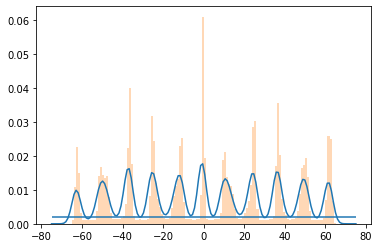

In [128]:
from scipy.stats import gaussian_kde

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

data = mdfo_calib.get("diffL2")
#bandwidth = 0.9

density1 = gaussian_kde(data)
xs = np.linspace(-75,75,150)
plt.plot(xs,density1(xs))
plt.hist(data,density=True,alpha=0.3,range=(-75,75),bins=150)
plt.hlines(0.002,xs[0],xs[-1])
plt.show()

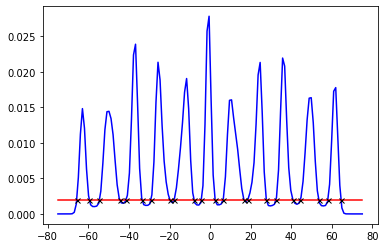

In [113]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()
data = mdfo_calib.get("diffL2")
bandwidth = 0.03
density1 = gaussian_kde(data, bw_method=bandwidth)
xs = np.linspace(-75,75,150)
t = xs
curve1 = density1(xs)
curve2 = len(curve1) * [0.002]
vals = getIntersections(t, curve1, curve2)

In [114]:
L1 = np.reshape(vals,[11,2])
L1

array([[-65.77684894, -59.45548525],
       [-54.57257411, -44.48214352],
       [-41.47196787, -33.45674206],
       [-29.23721378, -19.82229486],
       [-17.79894116,  -7.87123436],
       [ -4.35676442,   2.47370176],
       [  6.30463382,  16.76725075],
       [ 18.53501085,  27.72201872],
       [ 32.38944944,  40.83525639],
       [ 44.39489004,  53.59576872],
       [ 58.00035882,  64.5655992 ]])

In [123]:
i = 1
TDCS_L1 = []

for peak in L1:
    if i != 1: #not using the first peak as analysis already done in Section 1
    # isolate the peaks
        mdfo_calib.reload()
        mdfo_calib.keep4by4Events()
        mdfo_calib.keepEvents("diffL1",peak[1],"<=")
        mdfo_calib.keepEvents("diffL1",peak[0],">=")
    # generate the L2 peaks
        L2 = getIndividualPeaks(mdfo_calib, "diffL2",thresh=0.002,bw=0.03,doPlot=False)
        for each_peak in L2:
            mdfo_calib.reload()
            mdfo_calib.keep4by4Events()
            mdfo_calib.keepEvents("diffL1",peak[1],"<=")
            mdfo_calib.keepEvents("diffL1",peak[0],">=")
            
            mdfo_calib.keepEvents("diffL2",each_peak[1],"<=")
            mdfo_calib.keepEvents("diffL2",each_peak[0],">=")
            # store the tdcs
            TDCS_L1.append(mdfo_calib.get("L1"))
            #mdfo_calib.getHistogram("L1",range=(0,200))            
            #mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)
    i+=1

In [124]:
len(TDCS_L1)

110

In [125]:
TDCS_L1 = np.reshape(TDCS_L1,[10,11])
TDCS_L1

array([[array([85., 87., 93., ..., 87., 84., 85.]),
        array([85., 89., 84., ..., 87., 97., 88.]),
        array([83., 86., 84., ..., 80., 87., 83.]),
        array([87., 90., 82., ..., 91., 86., 83.]),
        array([75., 87., 83., ..., 84., 86., 80.]),
        array([83., 87., 83., ..., 83., 87., 86.]),
        array([89., 84., 86., ..., 83., 87., 91.]),
        array([91., 93., 90., ..., 89., 89., 88.]),
        array([93., 90., 91., ..., 91., 93., 88.]),
        array([89., 94., 90., ..., 93., 91., 89.]),
        array([92., 86., 94., ..., 98., 91., 89.])],
       [array([102., 102.,  98., ...,  97.,  96.,  94.]),
        array([ 91.,  90., 101., ...,  93., 108.,  94.]),
        array([90., 94., 95., ..., 95., 92., 99.]),
        array([94., 94., 94., ..., 93., 91., 90.]),
        array([88., 92., 87., ..., 91., 90., 89.]),
        array([89., 89., 91., ..., 87., 90., 92.]),
        array([90., 91., 87., ..., 91., 86., 94.]),
        array([85., 89., 86., ..., 83., 93., 86.]),

In [129]:
import seaborn as sns

sns.color_palette("Spectral")
bins = 50

colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]

info_tdc = []

for i, tdc_hists in enumerate(TDCS_L1):
    TDCMean(i, tdc_hists)
    info_tdc.append(getTDCInfo(i, tdc_hists))

    
    for j,tdc_hist in enumerate(tdc_hists):
        TDCHisto(i,j,tdc_hist,bins,range,colors)
    plt.savefig("tdc_hist_{}.pdf".format(i+2))
    plt.clf()
    plt.show()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [130]:
x1_y_l1 = (data_x_means, data_x_stds)

info_tdc.insert(0,x1_y_l1)

# Understanding the Trends


$$ T(y_j) = T_c(x_i) + T_p(x_i,y_i) - T_t(x_i,y_i) $$

**fix flipped**

In [ ]:
def getMeansPlot(data):
    k = 1
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        plt.plot(-np.array(i[0]),label="{}".format(k),color=colors[k-1])
        k+=1
        plt.legend()
        plt.ylabel("Means of TDC")
        plt.xlabel("Y coordinate")
    plt.show()
    
def getStdPlot(data):
    k = 1
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        plt.plot(-np.array(i[1]),label="{}".format(k),color=colors[k-1])
        k+=1
        plt.legend()
        plt.ylabel("Std of TDC")
        plt.xlabel("Y coordinate")
    plt.show()
    
#getMeansPlot(info_tdc)
#getStdPlot(info_tdc)

In [ ]:
from scipy import stats

def getSlope(data):
    k = 1
    slopes = []
    coorel = []
    pvals = []
    intercepts = []
    means = []
    y_coord = [(i+1)*5 for i in range(11)]
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        slope, intercept, r_value, p_value, std_err = stats.linregress(y_coord,-np.array(i[0]))
        plt.plot(y_coord, -np.array(i[0]),label="{}".format(k),color=colors[k-1])
        plt.plot(y_coord,slope*np.array(y_coord)+intercept,'--k',alpha=0.5)
        k+=1
        slopes.append(slope)
        coorel.append(r_value)
        pvals.append(p_value)
        intercepts.append(abs(intercept))
        means.append(np.mean(i[0]))
        plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Linear Fit of TDC Means",fontsize=15)
        plt.ylabel("Means of TDC")
        plt.xlabel("Y (cm)")
    plt.show()
    return slopes, coorel, means, pvals
    
slopes, correl, means, pvals = getSlope(info_tdc)

In [ ]:
plt.plot([i+1 for i in range(11)], slopes)
plt.ylabel("Slope (TDC/cm)")
plt.xlabel("X Coordinate")
plt.grid()
plt.show()

---

**Some Statistics Refreshers:**

R-square value tells you how much variation is explained by your model. So 0.1 R-square means that your model explains 10% of variation within the data. The greater R-square the better the model. Whereas p-value tells you about the F statistic hypothesis testing of the "fit of the intercept-only model and your model are equal". So if the p-value is less than the significance level (usually 0.05) then your model fits the data well.
Thus you have four scenarios:

1) low R-square and low p-value (p-value <= 0.05)

2) low R-square and high p-value (p-value > 0.05)

3) high R-square and low p-value

4) high R-square and high p-value

Interpretation:

1) means that your model doesn't explain much of variation of the data but it is significant (better than not having a model)

2) means that your model doesn't explain much of variation of the data and it is not significant (worst scenario)

3) means your model explains a lot of variation within the data and is significant (best scenario)

4) means that your model explains a lot of variation within the data but is not significant (model is worthless)

---

In [ ]:
plt.plot([i+1 for i in range(11)], correl,'--o',markersize=12)
plt.ylabel("Correlation (linear fit)")
plt.xlabel("X Coordinate")
plt.title("R - Value")
plt.grid()
plt.show()

In [ ]:
plt.plot([i+1 for i in range(11)], pvals,'--o',markersize=12)
plt.ylabel("Correlation (linear fit)")
plt.xlabel("X Coordinate")
plt.title("P - Value")
plt.grid()
plt.show()

## The effect of statistics

We know the distribution of the muon flux on our system is Gaussian. This means that most hits are located within $\{5 \le x \ge 7\} \cup \{5 \le y \ge 7\}$. This higher statistics explains why we see a better fit and the linear TDC pattern for this class of events.

The p-value plot also shows that the edge cases are statistically significant, I, as of now, still can't explain this...

## Investigating the effect of delay cables

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress([i+1 for i in range(11)],means)
plt.plot([i+1 for i in range(11)], means)
plt.ylabel("Mean TDC")
plt.xlabel("X Coordinate")
plt.title("TDC = {}x + {} [r={}]]".format(round(slope,2),round(intercept,2),round(r_value,2)))
plt.grid()
plt.show()

Each X coordinate adds $3.11$ ns delay which is expected due to our scheme (i.e. the effect of $T_c(x_i)$).

## Investigating Effect of Trigger:

See Section 8.

# Photon Propagation Speed

In [ ]:
c = 299792458
speed_scint = c/1.58
speed_scint

In [ ]:
photo_speed = (2/np.array(slopes))*10**7

fig = plt.figure()
ax = fig.add_subplot(111)


plt.plot([i+1 for i in range(11)],photo_speed,'--x',label="measured")
plt.plot(12*[speed_scint],'--',label="expected")
plt.plot(12*[c],'--',label="c")

for i, v in enumerate(photo_speed):
    ax.text(i, v, str(round(correl[i], 2)),ha="left",va="bottom",size="small")

plt.legend()
plt.title("Photon Propagation Speed",fontsize=15)
plt.ylabel("Photon speed (m/s)")
plt.xlabel("X Coordinate")
plt.grid()
plt.show()

## Refraction Index Calculation

In [ ]:
eta_scint = c/np.mean(photo_speed[4:6])
eta_scint

The value we expect is $1.58$ and the value we calculate is 3.12. An error of $97\%$. I may be not doing this correctly as well....

# TDC Fit of X

In [135]:
def getSlopeY(data):
    data = getXTDCMeans(data)
    k = 1
    slopes = []
    coorel = []
    y_coord = [i+1 for i in range(11)]
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        slope, intercept, r_value, p_value, std_err = stats.linregress(y_coord,-np.array(i))
        plt.plot(y_coord, -np.array(i),label="{}".format(k),color=colors[k-1])
    #    plt.plot(y_coord,slope*np.array(y_coord)+intercept,'--k',alpha=0.5)
        k+=1
        slopes.append(slope)
        coorel.append(r_value)
        plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Linear Fit of TDC Means",fontsize=15)
        plt.ylabel("Means of TDC")
        plt.xlabel("X coordinate")
    plt.show()
    return slopes, coorel

def getXTDCMeans(data):
    xmeans = []
    for i in range(len(data)):
        xmeans.append([x[i] for x in data])
    return xmeans

tdc_means_L1 = [i[0] for i in info_tdc]
slopesY, correlY = getSlopeY(tdc_means_L1)

TypeError: 'tuple' object is not callable

In [ ]:
plt.plot([i+1 for i in range(11)], slopesY)
plt.ylabel("Slope (linear fit)")
plt.xlabel("Y Coordinate")
plt.grid()
plt.show()

In [ ]:
plt.plot([i+1 for i in range(11)], correlY)
plt.ylabel("Correlation (linear fit)")
plt.xlabel("Y Coordinate")
plt.title("R - Value")
plt.grid()
plt.show()

# Trigger Analysis


## Making Cuts on Peaks

We know,

$$T_r = (T_c + T_p - T_t)*0.5 $$

Here, $T_r$ is the time in ns of the readout from the channel. $T_c$ is the **constant delay** due to cables, $T_p$ is the **photon propagation time** and $T_t$ is the **trigger time**.    

The trigger time distribution is as follows:

In [ ]:
mdfo_calib.reload()
mdfo_calib.getCounterPlots()

In [ ]:
def getIndividualPeaks(mdfo,
                       coord,
                       thresh=0.002,
                       bw=0.009,
                       axes=[-75, 75],
                       N=150,
                       doPlot=True):
    data = mdfo.get(coord)

    density1 = gaussian_kde(data, bw_method=bw)
    xs = np.linspace(axes[0], axes[1], N)

    t = xs
    curve1 = density1(xs)
    curve2 = len(curve1) * [thresh]
    vals = getIntersections(t, curve1, curve2,doPlot=doPlot)
    vals = np.reshape(vals,[11,2])
    return vals

In [ ]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("TopCounter", 95, "<=")
mdfo_calib.keepEvents("BottomCounter", 85, "<=")

data = mdfo_calib.get("diffL1")
bandwidth = 0.009

density1 = gaussian_kde(data, bw_method=bandwidth)
xs = np.linspace(-75,75,150)

t = xs
curve1 = density1(xs)
curve2 = len(curve1) * [0.002]

vals = getIntersections(t, curve1, curve2, doPlot=True)

In [ ]:
L1 = np.reshape(vals,[11,2])

In [ ]:
i = 1
TDCS_L1 = []

for peak in L1:
    if i != 1: #not using the first peak as analysis already done in Section 1
    # isolate the peaks
        mdfo_calib.reload()
        mdfo_calib.keep4by4Events()
        mdfo_calib.keepEvents("TopCounter", 95, "<=")
        mdfo_calib.keepEvents("BottomCounter", 85, "<=")
        mdfo_calib.keepEvents("diffL1",peak[1],"<=")
        mdfo_calib.keepEvents("diffL1",peak[0],">=")
    # generate the L2 peaks
        L2 = getIndividualPeaks(mdfo_calib, "diffL2",thresh=0.002,bw=0.03,doPlot=True)
        for each_peak in L2:
            mdfo_calib.reload()
            mdfo_calib.keep4by4Events()
            mdfo_calib.keepEvents("TopCounter", 95, "<=")
            mdfo_calib.keepEvents("BottomCounter", 85, "<=")
            
            mdfo_calib.keepEvents("diffL1",peak[1],"<=")
            mdfo_calib.keepEvents("diffL1",peak[0],">=")
            
            mdfo_calib.keepEvents("diffL2",each_peak[1],"<=")
            mdfo_calib.keepEvents("diffL2",each_peak[0],">=")
        
            # store the tdcs
            TDCS_L1.append(mdfo_calib.get("L1"))
           # mdfo_calib.getHistogram("L1",range=(0,200))            
         #   mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)
    i+=1

In [ ]:
TDCS_L1 = np.reshape(TDCS_L1,[10,11])

In [ ]:
import seaborn as sns

sns.color_palette("Spectral")
bins = 50

colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]

info_tdc = []

for i, tdc_hists in enumerate(TDCS_L1):
    TDCMean(i, tdc_hists)
    info_tdc.append(getTDCInfo(i, tdc_hists))
   # for j,tdc_hist in enumerate(tdc_hists):
   #     TDCHisto(i,j,tdc_hist,bins,range,colors)
   # plt.savefig("tdc_hist_{}_2.pdf".format(i+2))
   # plt.clf()
  #  plt.show()


In [ ]:
def getMeansPlot(data):
    k = 1
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        plt.plot(i[0],label="{}".format(k),color=colors[k-1])
        k+=1
        plt.legend()
        plt.ylabel("Means of TDC")
        plt.xlabel("Y coordinate")
    plt.show()
    
def getStdPlot(data):
    k = 1
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        plt.plot(i[1],label="{}".format(k),color=colors[k-1])
        k+=1
        plt.legend()
        plt.ylabel("Std of TDC")
        plt.xlabel("Y coordinate")
    plt.show()


In [ ]:
from scipy import stats

def getSlope(data):
    k = 1
    slopes = []
    coorel = []
    pvals = []
    y_coord = [(i+1)*5 for i in range(11)]
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        slope, intercept, r_value, p_value, std_err = stats.linregress(y_coord,-np.array(i[0]))
        plt.plot(y_coord, -np.array(i[0]),label="{}".format(k),color=colors[k-1])
        plt.plot(y_coord,slope*np.array(y_coord)+intercept,'--k',alpha=0.5)
        k+=1
        slopes.append(slope)
        coorel.append(r_value)
        pvals.append(p_value)
        plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Linear Fit of TDC Means",fontsize=15)
        plt.ylabel("Means of TDC")
        plt.xlabel("Y (cm)")
    plt.show()
    return slopes, coorel
    
slopes, correl = getSlope(info_tdc)

In [ ]:
getStdPlot(info_tdc)

In [ ]:
plt.plot([i+1 for i in range(10)], slopes)
plt.ylabel("Slope (TDC/cm)")
plt.xlabel("X Coordinate")
plt.grid()
plt.show()

In [ ]:
plt.plot([i+1 for i in range(10)], correl)
plt.ylabel("R-Value")
plt.xlabel("X Coordinate")
plt.grid()
plt.show()

## Looking at Trigger Distributions for each Grid

Look at how the trigger data changes for each $(x,y)$ cell and test if the equation holds.

Need help: trigger eqn? (bottom - top)?

# Fixing Y-Coordinate and Changing X

In [ ]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()

data = mdfo_calib.get("diffL2")
bandwidth = 0.009

density1 = gaussian_kde(data, bw_method=bandwidth)
xs = np.linspace(-75,75,150)

t = xs
curve1 = density1(xs)
curve2 = len(curve1) * [0.002]

vals = getIntersections(t, curve1, curve2)

In [ ]:
L1 = np.reshape(vals,[11,2])
L1

In [ ]:
i = 1
TDCS_L1 = []

for peak in L1:
    if i != 1: #not using the first peak as analysis already done in Section 1
    # isolate the peaks
        mdfo_calib.reload()
        mdfo_calib.keep4by4Events()
        mdfo_calib.keepEvents("diffL1",peak[1],"<=")
        mdfo_calib.keepEvents("diffL1",peak[0],">=")
    # generate the L2 peaks
        L2 = getIndividualPeaks(mdfo_calib, "diffL2",thresh=0.002,bw=0.03,doPlot=True)
        for each_peak in L2:
            mdfo_calib.reload()
            mdfo_calib.keep4by4Events()
            mdfo_calib.keepEvents("diffL1",peak[1],"<=")
            mdfo_calib.keepEvents("diffL1",peak[0],">=")
            
            mdfo_calib.keepEvents("diffL2",each_peak[1],"<=")
            mdfo_calib.keepEvents("diffL2",each_peak[0],">=")
            # store the tdcs
            TDCS_L1.append(mdfo_calib.get("L1"))
           # mdfo_calib.getHistogram("L1",range=(0,200))            
         #   mdfo_calib.getHistogram("diffL2",range=(-75,75),nbins=50)
    i+=1

In [ ]:
TDCS_L1 = np.reshape(TDCS_L1,[10,11])
TDCS_L1

In [ ]:
import seaborn as sns

sns.color_palette("Spectral")
bins = 50

colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]

info_tdc = []

for i, tdc_hists in enumerate(TDCS_L1):
    #TDCMean(i, tdc_hists,name="l2")
    info_tdc.append(getTDCInfo(i, tdc_hists))

    """
    for j,tdc_hist in enumerate(tdc_hists):
        TDCHisto(i,j,tdc_hist,bins,range,colors)
    plt.savefig("tdc_hist_{}_l2.pdf".format(i+2))
    plt.clf()
    plt.show()
    """    

In [ ]:
from scipy import stats

def getSlope(data):
    k = 1
    slopes = []
    coorel = []
    pvals = []
    y_coord = [(i+1)*5 for i in range(11)]
    colors = ["red","blue","green","lawngreen","sienna","gold","black","maroon","olive","cyan","fuchsia"]
    for i in data:
        slope, intercept, r_value, p_value, std_err = stats.linregress(y_coord,-np.array(i[0]))
        plt.plot(y_coord, -np.array(i[0]),label="{}".format(k),color=colors[k-1])
        plt.plot(y_coord,slope*np.array(y_coord)+intercept,'--k',alpha=0.5)
        k+=1
        slopes.append(slope)
        coorel.append(r_value)
        pvals.append(p_value)
        plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Linear Fit of TDC Means",fontsize=15)
        plt.ylabel("Means of TDC")
        plt.xlabel("X (cm)")
    plt.show()
    return slopes, coorel
    
slopes, correl = getSlope(info_tdc)

In [ ]:
plt.plot([i+1 for i in range(11)], slopesY)
plt.ylabel("Slope (linear fit)")
plt.xlabel("X Coordinate")
plt.grid()
plt.show()

In [ ]:
plt.plot([i+1 for i in range(11)], correlY)
plt.ylabel("Correlation (linear fit)")
plt.xlabel("X Coordinate")
plt.title("R - Value")
plt.grid()
plt.show()